In [4]:
import pandas as pd

In [5]:
train=pd.read_csv("titanic.csv")

In [6]:
train.shape

(891, 12)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
import seaborn as sns

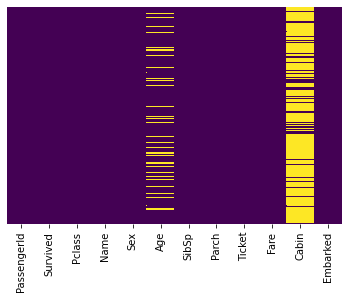

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

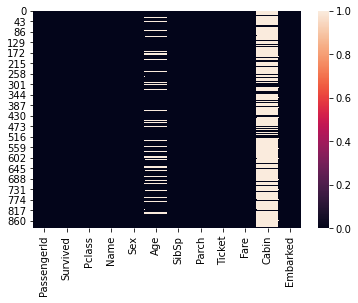

In [10]:
sns.heatmap(train.isnull())

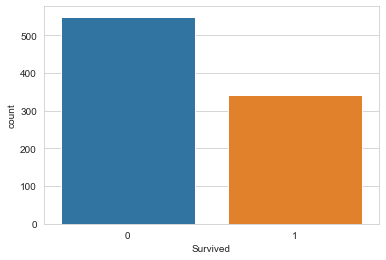

In [11]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=train)

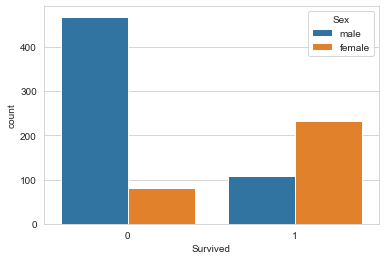

In [12]:
sns.countplot(x='Survived',hue="Sex",data=train)

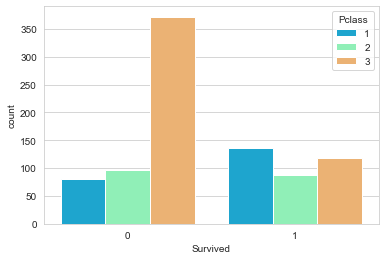

In [13]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

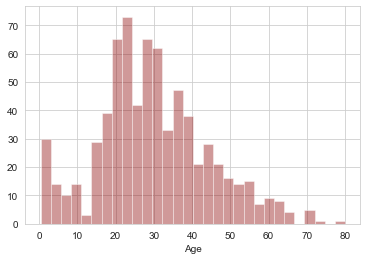

In [14]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

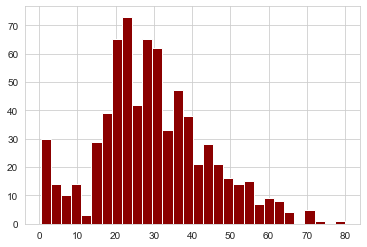

In [15]:
train["Age"].hist(bins=30,color='darkred')

In [16]:
from matplotlib import pyplot as plt

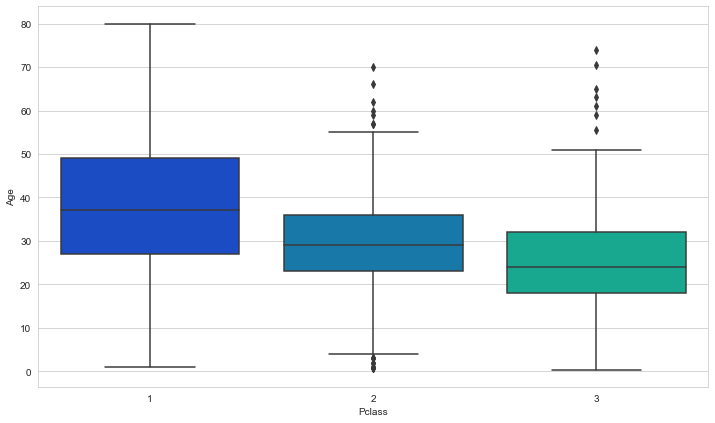

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [18]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
train["Age"]=train[["Age","Pclass"]].apply(input_age,axis=1)

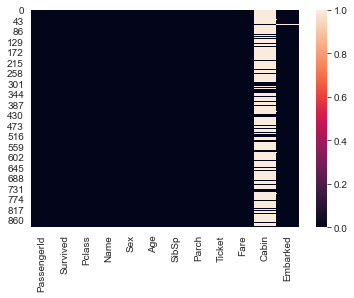

In [20]:
sns.heatmap(train.isnull())

### Feature engineering technics

# Missing Values- Feature Engineering- Day 1
Lifecycle of a Data Science Projects

Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
Feature Engineering---Handling Missing Values
Why are their Missing values?? Survey--Depression Survey

They hesitate to put down the information
Survey informations are not that valid
Men--salary
Women---age
People may have died----NAN
Data Science Projects---Dataset should be collected from multiple sources

# 
What are the different types of Missing Data?
##### Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [21]:
import pandas as pd

In [22]:

df=pd.read_csv('titanic.csv')

In [23]:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [25]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

# Missing At Random(MAR)
Men---hide their salary
Women---hide their age


### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

# Mean/ MEdian /Mode imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [26]:
df=pd.read_csv('titanic.csv',usecols=['Age',"Fare","Survived"])

In [27]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [28]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [29]:
median=df.Age.median()

In [30]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [31]:
print(df["Age"].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


# Advantages And Disadvantages of Mean/Median Imputation

### Advantages
Easy to implement(Robust to outliers)
Faster way to obtain the complete dataset 
#### Disadvantages
Change or Distortion in the original variance
Impacts Correlation

# Random Sample Imputation

In [32]:
df.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
dtype: float64

In [33]:
df["Age"].dropna().sample()

703    25.0
Name: Age, dtype: float64

In [34]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=2)

471    38.0
542    11.0
719    33.0
137    37.0
654    18.0
       ... 
429    32.0
586    47.0
789    46.0
746    16.0
836    21.0
Name: Age, Length: 177, dtype: float64

In [35]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    
    df[variable+"_random"]=df[variable]
    ## it will have random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## pandas need to have same index in order to merge the sataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [36]:
median

28.0

In [37]:
impute_nan(df,"Age",median)

In [38]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


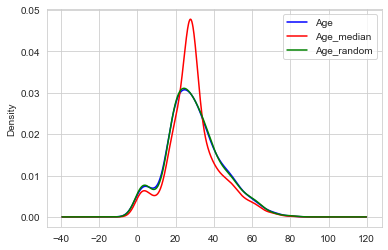

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax,color='blue')
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Advantages
Easy To implement
There is less distortion in variance
# Disadvantage
Every situation randomness wont work
Capturing NAN values with a new feature
It works well if the data are not missing completely at random

# Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [40]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [41]:
df

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0
...,...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0,0
887,1,19.0,30.0000,19.0,19.0,0
888,0,NaN,23.4500,28.0,15.0,1
889,1,26.0,30.0000,26.0,26.0,0


In [42]:
df.Age.median()

28.0

In [44]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [46]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0
5,0,28.0,8.4583,28.0,28.0,1
6,0,54.0,51.8625,54.0,54.0,0
7,0,2.0,21.0750,2.0,2.0,0
8,1,27.0,11.1333,27.0,27.0,0
9,1,14.0,30.0708,14.0,14.0,0


# Advantages
Easy to implement
Captures the importance of missing values
# Disadvantages
Creating Additional Features(Curse of Dimensionality)

# End of Distribution imputation

In [47]:
df=pd.read_csv('titanic.csv',usecols=['Age',"Fare","Survived"])

In [48]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


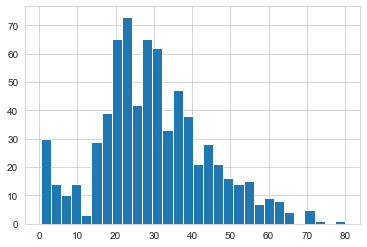

In [50]:
df["Age"].hist(bins=30)

In [54]:
extream=df["Age"].mean()+3*df["Age"].std()

In [55]:
extream

73.27860964406095

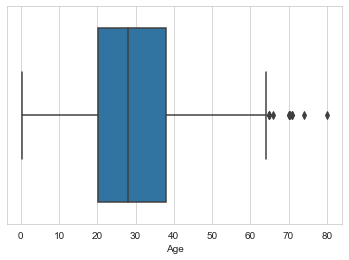

In [56]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [57]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [59]:
impute_nan(df,'Age',df.Age.median(),extream)

In [60]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


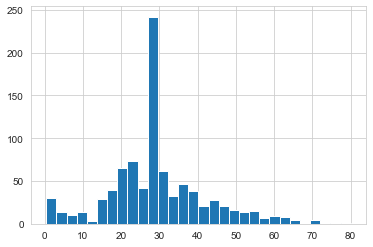

In [61]:
df["Age"].hist(bins=30)

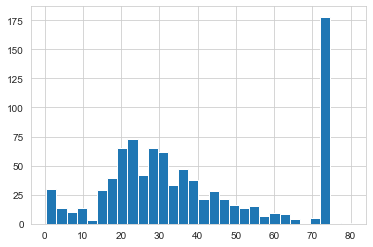

In [63]:
df["Age_end_distribution"].hist(bins=30)

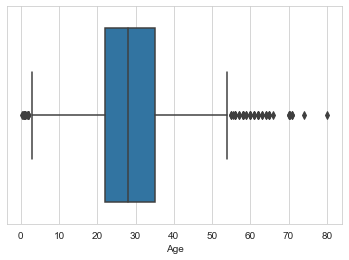

In [64]:
sns.boxplot("Age",data=df)

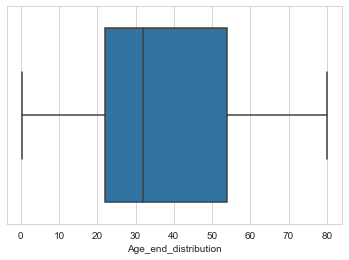

In [65]:
sns.boxplot("Age_end_distribution",data=df)

# Arbitrary imputation
this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [67]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [68]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

In [69]:
impute_nan(df,"Age")

In [70]:
df.head(10)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


# Advantages
Easy to implement
Captures the importance of missingess if there is one
# Disadvantages
Distorts the original distribution of the variable
If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
Hard to decide which value to use

# How To Handle Categroical Missing Values
# Frequent Category Imputation

In [71]:
df=pd.read_csv("house_price_pred.csv")

In [73]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [74]:
df=pd.read_csv('house_price_pred.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [75]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [76]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [79]:
df.isnull().mean().sort_values(ascending=True)*100

SalePrice       0.000000
BsmtQual        2.534247
GarageType      5.547945
FireplaceQu    47.260274
dtype: float64

# Compute the frequency with every feature

In [82]:
df["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

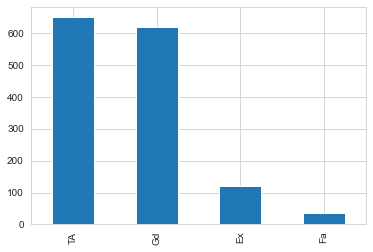

In [85]:
df["BsmtQual"].value_counts().plot.bar()

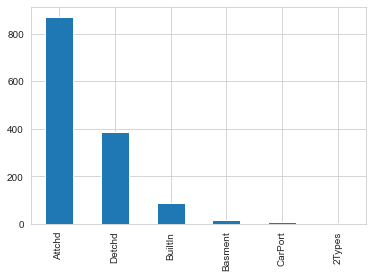

In [87]:
df["GarageType"].value_counts().plot.bar()

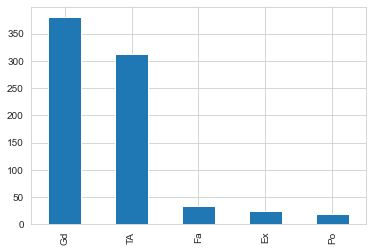

In [88]:
df["FireplaceQu"].value_counts().plot.bar()

In [89]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [90]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [91]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

# Advantages
Easy To implement
Fater way to implement 
# Disadvantages
Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
It distorts the relation of the most frequent label

# Adding a variable to capture NAN

In [95]:
df=pd.read_csv('house_price_pred.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [96]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [97]:
df['BsmtQual'].mode()[0]

'TA'

In [99]:
frequent=df['BsmtQual'].mode()[0]

In [100]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [102]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [103]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)

In [104]:
frequent=df['FireplaceQu'].mode()[0]

In [105]:
df['FireplaceQu'].fillna(frequent,inplace=True)

In [106]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


# Suppose if you have more frequent categories, we just replace NAN with a new category

In [107]:
df=pd.read_csv('house_price_pred.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [108]:

def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [109]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [110]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,Missing,Attchd
6,Ex,Gd,Attchd,307000,Ex,Gd,Attchd
7,Gd,TA,Attchd,200000,Gd,TA,Attchd
8,TA,TA,Detchd,129900,TA,TA,Detchd
9,TA,TA,Attchd,118000,TA,TA,Attchd


In [111]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)